In [5]:
# CSV inlezen, groepen maken, gemiddelde leeftijd per groep
import re
import os, fnmatch, facemorpher
from pyagender import PyAgender
import cv2
path = "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/SiblingsDB/"
f = open('/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/SiblingsDB/subjects.csv', 'r')
onder_10 = []
onder_20 = []
onder_30 = []
onder_40 = []
onder_50 = []
onder_60 = []
onder_70 = []
onder_80 = []
Age_onder_10 = 0
Age_onder_20 = 0
Age_onder_30 = 0
Age_onder_40 = 0
Age_onder_50 = 0
Age_onder_60 = 0
Age_onder_70 = 0
Age_onder_80 = 0

for row in f:
    data = (row.split(" "))
    data_split = (str(data).replace('"', ',').split(","))
    number = data_split[0].replace('\\t','').replace("'", "").replace('[', '')
    leeftijd = data_split[4].replace('\\t','')
    if int(leeftijd) < 10:
        onder_10.append(number)
        Age_onder_10 = Age_onder_10 + int(leeftijd)
    elif int(leeftijd) < 20 and int(leeftijd) > 10:
        onder_20.append(number)
        Age_onder_20 = Age_onder_20 + int(leeftijd)
    elif int(leeftijd) < 30 and int(leeftijd) > 20:
        onder_30.append(number)
        Age_onder_30 = Age_onder_30 + int(leeftijd)
    elif int(leeftijd) < 40 and int(leeftijd) > 30:
        onder_40.append(number)
        Age_onder_40 = Age_onder_40 + int(leeftijd)
    elif int(leeftijd) < 50 and int(leeftijd) > 40:
        onder_50.append(number)
        Age_onder_50 = Age_onder_50 + int(leeftijd)
    elif int(leeftijd) < 60 and int(leeftijd) > 50:
        onder_60.append(number)
        Age_onder_60 = Age_onder_60 + int(leeftijd)
    elif int(leeftijd) < 70 and int(leeftijd) > 60:
        onder_70.append(number)
        Age_onder_70 = Age_onder_70 + int(leeftijd)
    elif int(leeftijd) < 80 and int(leeftijd) > 70:
        onder_80.append(number)
        Age_onder_80 = Age_onder_80 + int(leeftijd)
        
AVG_onder_10 = Age_onder_10 / len(onder_10)        
AVG_onder_20 = Age_onder_20 / len(onder_20) 
AVG_onder_30 = Age_onder_30 / len(onder_30) 
AVG_onder_40 = Age_onder_40 / len(onder_40) 
AVG_onder_50 = Age_onder_50 / len(onder_50) 
AVG_onder_60 = Age_onder_60 / len(onder_60) 
AVG_onder_70 = Age_onder_70 / len(onder_70) 
AVG_onder_80 = Age_onder_80 / len(onder_80) 

x_as = [AVG_onder_10, AVG_onder_20, AVG_onder_30, AVG_onder_40, AVG_onder_50]
#x_as = [AVG_onder_10, AVG_onder_20, AVG_onder_30, AVG_onder_40, AVG_onder_50, AVG_onder_60, AVG_onder_70, AVG_onder_80]

In [2]:
len(onder_50)

16

34
None
76
None
101
None
102
None
103
None
105
None
174
None
188
None
214
None
215
None
231
/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/SiblingsDB/DBs/HQf/231
233
None
257
None
258
None
['/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/SiblingsDB/DBs/HQf/231/231.jpg']
Averaged 1 images
result.png saved


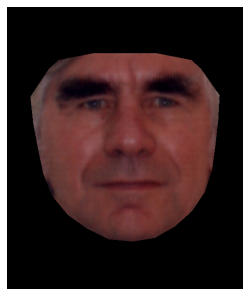

[{'left': 0, 'top': 0, 'right': 499, 'bottom': 589, 'width': 499, 'height': 589, 'gender': 0.08903566, 'age': 49.02055600383028}]


In [31]:
# Vind het pad naar alle fotos per groep + check welke bestaan + average deze faces 
import os, fnmatch, facemorpher
from pyagender import PyAgender
import cv2

x = os.getcwd()

def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in dirs:
            return os.path.join(root, name)
        
def find2(pattern, path):
    result = []
    for root, dirs, files in os.walk(path):
        for name in files:
            if fnmatch.fnmatch(name, pattern):
                result.append(os.path.join(root, name))
    return result


#pictures = ""
pictures = []
for i in onder_70:
    print(i)
    path = find(i,x)
    print(path)
    if str(path) != "None":
        z = find2('*.jpg', path)
        #pictures = pictures + " " + '"' + str(z[0]) + '"'
        #print(z)
        pictures.append(str(z[0]))
print(pictures)

#facemorpher.morpher(pictures, plot=True)
facemorpher.averager(pictures, plot=True)

agender = PyAgender() 
# see available options in __init__() src

faces = agender.detect_genders_ages(cv2.imread("/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/result.png"))
print(faces)


Using TensorFlow backend.


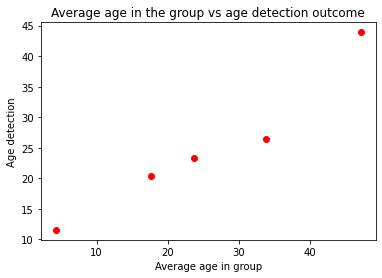

In [3]:
# Vergelijk de gemiddelde leeftijd met de detected leeftijd van de morph van deze leeftijd groep
from pyagender import PyAgender
import cv2
import matplotlib.pyplot as plt

agender = PyAgender() 
# see available options in __init__() src

faces_onder_10 = agender.detect_genders_ages(cv2.imread("Onder_10.png"))
faces_onder_20 = agender.detect_genders_ages(cv2.imread("Onder_20.png"))
faces_onder_30 = agender.detect_genders_ages(cv2.imread("Onder_30.png"))
faces_onder_40 = agender.detect_genders_ages(cv2.imread("Onder_40.png"))
faces_onder_50 = agender.detect_genders_ages(cv2.imread("Onder_50.png"))

age_onder_10 = faces_onder_10[0]['age']
age_onder_20 = faces_onder_20[0]['age']
age_onder_30 = faces_onder_30[0]['age']
age_onder_40 = faces_onder_40[0]['age']
age_onder_50 = faces_onder_50[0]['age']

y_as = [age_onder_10, age_onder_20, age_onder_30, age_onder_40, age_onder_50]


plt.plot(x_as,y_as, 'ro')
plt.xlabel('Average age in group')
plt.ylabel('Age detection')
plt.title("Average age in the group vs age detection outcome")
plt.savefig('Avg-detect.png')

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_10.png


/opt/anaconda3/envs/ML/lib/python3.7/site-packages/facemorpher/plotter.py:71: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  p = plt.subplot(self.rows, self.cols, self.plot_counter)


output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


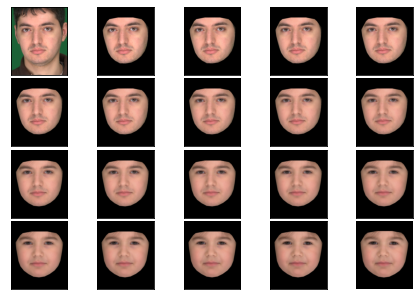

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_20.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


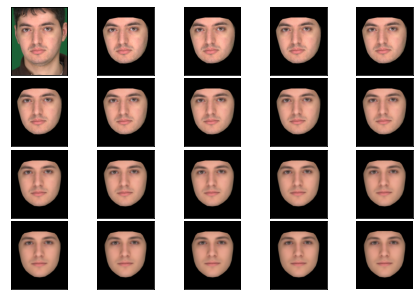

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_30.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


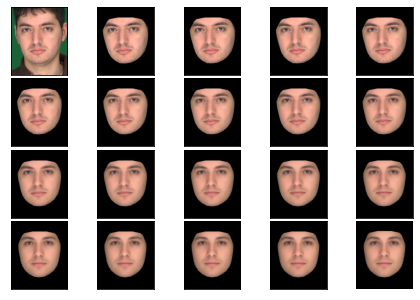

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_40.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


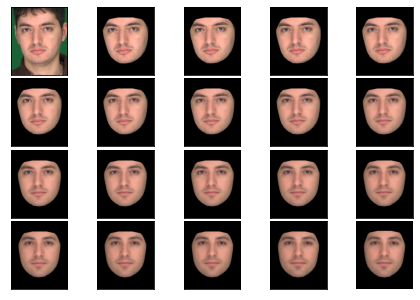

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_50.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


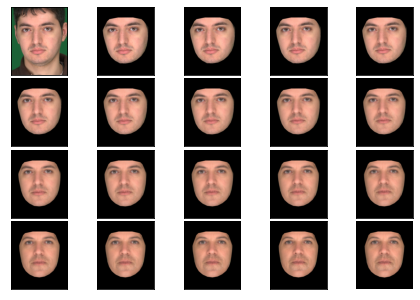

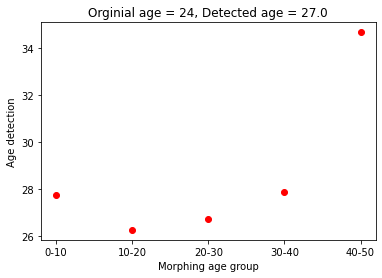

In [6]:
# Morph een foto met de gemiddelde foto van de leeftijd groepen + age detection van deze nieuwe foto
orginele_foto = "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg"
Known = "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0869.jpg"



def morphing(orginele_foto, morph_foto):
    faces = agender.detect_genders_ages(cv2.imread(orginele_foto))
    original_age = faces[0]['age']
    pictures = [orginele_foto, morph_foto]
    facemorpher.morpher(pictures, plot=True, out_frames='output')

    faces = agender.detect_genders_ages(cv2.imread("/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/output/frame009.png"))
    Morphing_age = faces[0]['age']
    return Morphing_age, original_age

Morphing_onder_10, original_age = morphing(orginele_foto, "Onder_10.png")
Morphing_onder_20, original_age = morphing(orginele_foto, "Onder_20.png")
Morphing_onder_30, original_age = morphing(orginele_foto, "Onder_30.png")
Morphing_onder_40, original_age = morphing(orginele_foto, "Onder_40.png")
Morphing_onder_50, original_age = morphing(orginele_foto, "Onder_50.png")

y_as = [Morphing_onder_10, Morphing_onder_20, Morphing_onder_30, Morphing_onder_40, Morphing_onder_50]
x_as = ["0-10", "10-20", "20-30", "30-40", "40-50"]

plt.plot(x_as, y_as,'ro')
plt.xlabel('Morphing age group')
plt.ylabel('Age detection')
plt.title("Original age = 24, Detected age = " + str(round(original_age)))
plt.savefig('Detection.png')

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_10.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


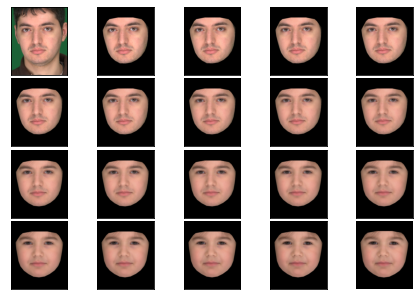

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_20.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


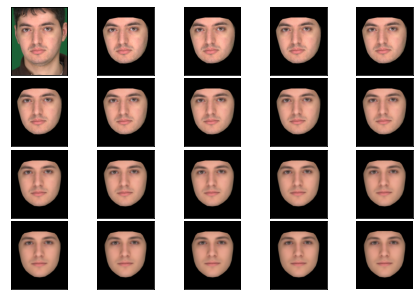

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_30.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


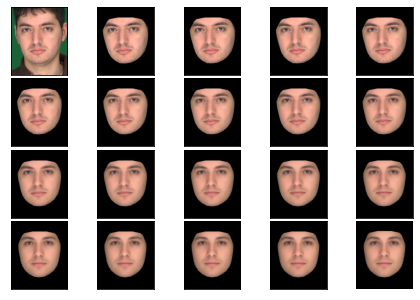

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_40.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


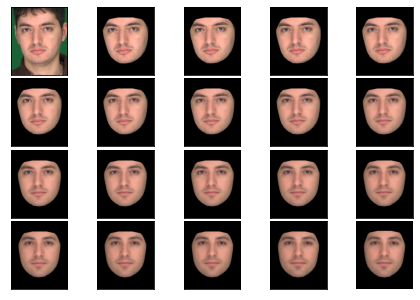

/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC0868.jpg
Onder_50.png
output/frame001.png saved
output/frame002.png saved
output/frame003.png saved
output/frame004.png saved
output/frame005.png saved
output/frame006.png saved
output/frame007.png saved
output/frame008.png saved
output/frame009.png saved
output/frame010.png saved
output/frame011.png saved
output/frame012.png saved
output/frame013.png saved
output/frame014.png saved
output/frame015.png saved
output/frame016.png saved
output/frame017.png saved
output/frame018.png saved


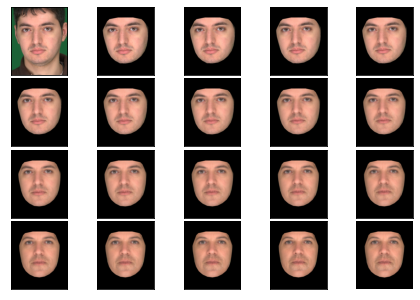

In [7]:
# Morph een foto met alle leeftijds groepen en sla deze op
from PIL import Image

def Save_morph_img(orginele_foto, morph_foto, age):
    pictures = [orginele_foto, morph_foto]
    facemorpher.morpher(pictures, plot=True, out_frames='output')

    # Open original image
    img = Image.open("/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/output/frame009.png")
    data = img.load()

    # Makes a copy of the input image and loads the copied image's pixel map
    copyImage = img.copy()

    copyImage.save("/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/test/"+age + '.png')
    copyImage.close()

#orginele_foto = "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/Backup-fotos/HQfps/204/_DSC2307.jpg"

Save_morph_img(orginele_foto, "Onder_10.png", '10')
Save_morph_img(orginele_foto, "Onder_20.png", '20')
Save_morph_img(orginele_foto, "Onder_30.png", '30')
Save_morph_img(orginele_foto, "Onder_40.png", '40')
Save_morph_img(orginele_foto, "Onder_50.png", '50')


The test image has a distance of 0.51 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? False

The test image has a distance of 0.41 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.41 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.39 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.47 from known image #0
- With a normal cutoff of 0.6, would the test

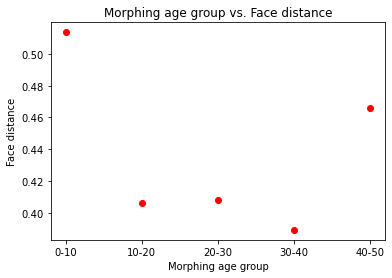

In [11]:
# Vergelijk 2 verschillende fotos - in dit geval een morph met elke leeftijdsgroep met een andere foto van deze persoon
import face_recognition
def compare_img(Known, Test):
    known_image = face_recognition.load_image_file(Known)
    face_encoding = face_recognition.face_encodings(known_image)[0]
    known_encodings = [face_encoding]
    image_to_test = face_recognition.load_image_file(Test)
    image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]
    face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)
    
    for i, face_distance in enumerate(face_distances):
        print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
        print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
        print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
        print()
    return face_distance


face_dist_10 = compare_img(Known, "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/test/10.png")
face_dist_20 = compare_img(Known, "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/test/20.png")
face_dist_30 = compare_img(Known, "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/test/30.png")
face_dist_40 = compare_img(Known, "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/test/40.png")
face_dist_50 = compare_img(Known, "/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/test/50.png")

face_dist = [face_dist_10, face_dist_20, face_dist_30, face_dist_40, face_dist_50]
x_face = ["0-10", "10-20", "20-30", "30-40", "40-50"]

plt.plot(x_face, face_dist, 'ro')
plt.xlabel('Morphing age group')
plt.ylabel('Face distance')
plt.title("Morphing age group vs. Face distance")
plt.savefig('AgevsDist204.png')

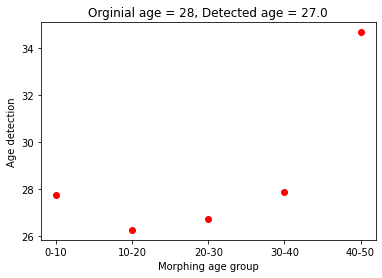

In [12]:
plt.plot(x_as, y_as,'ro')
plt.xlabel('Morphing age group')
plt.ylabel('Age detection')
plt.title("Orginial age = 28, Detected age = " + str(round(original_age)))
plt.savefig('Detection_204.png')

In [11]:
from pyagender import PyAgender
import cv2
agender = PyAgender() 
def age_det(name):
    faces = agender.detect_genders_ages(cv2.imread(name))
    age = faces[0]['age']
    return age
    
age = age_det('/Users/ellen/Documents/Twente/Q2/Introduction to biometrics/Final/SiblingsDB/DBs/HQf/149/_DSC0564.jpg')
print(age)

25.684509440124202
